Teoretiska Frågor
1. Beskriv kort hur en relationsdatabas fungerar.
Ans: I reletionella databaser är data i tabeller som består av rader och kolumner.Varje rad representerar en post, och varje kolumn representerar ett attribut för posten.Tabeller kan kopplas samman med hjälp av relationer, ofta baserade på primär- och främmande nycklar. Relationella databaser är två vanligt förekommande databashanterare MySQL och MSSQL. I dessa databashanterare används programeringsspråk SQL.

2. Vad menas med “CRUD”-flödet?

Ans:CRUD flodet är en akronym för Create, Read , Update and Delete.

3. Beskriv kort vad en “left join” och en “inner join” är. Varför använder man det?

Ans: SQL används två typer av operationer left join och inner join för att kombinera data från flera kolumner.

left join: En left join retunerar alla rader från de vänster tabellen och matchande de råderna från högre tabellen. Om det inte finns någon match i den högra tabellen, fylls dessa med NULL. Man använder den när man vill behålla alla data från vänstar tabellen, även om det inte finns motsvarande matchningar i den högra tabellen.

inner join:En Inner join visar bara de rader där det finns en match mellan tabellerna i det angivna fältet. Om det inte finns någon match, visas inte raden i resultatet. Man använder INNER JOIN när man bara vill ha data som finns i båda tabellerna.

4. Beskriv kort vad indexering i SQL innebär.

Ans: Indexering i SQL är ett sätt att göra det snabbare att söka, sortera och hämta data från en tabell. Det fungerar som ett register i en bok,och det är enkelt att hitta rätt information utan att behöva gå igenom allt.

5. Beskriv kort vad en vy i SQL är.
Ans: En vy i SQL är som en virtuell tabell som visar data från en eller flera tabeller. Den sparar inte data själv, utan visar information direkt från tabellerna.

6. Beskriv kort vad en lagrad procedur i SQL är.
Ans: En lagrad procedure är sparad kod som kan återanvändas. Den används för att utföra uppgifter som att lägga till, uppdatera eller hämta data. Du kan tänka på det som en funktion i ett program som kan köras flera gånger.

In [1]:
from sqlalchemy import create_engine, URL, inspect
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t


In [2]:
def new_engine(dialect, server, database, user=None, password=None, integrated_security=True):
    if integrated_security:
        # For Windows authentication
        eng = f"{dialect}://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"
    else:
        # For SQL Server authentication
        eng = f"{dialect}://{user}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
    print(eng)
    return create_engine(eng)
engine = new_engine('mssql', 'DESKTOP-DHGSK0V', 'AdventureWorks2022', integrated_security=True)
print(type(engine))
connection = engine.connect()
print(type(connection))

mssql://DESKTOP-DHGSK0V/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server
<class 'sqlalchemy.engine.base.Engine'>
<class 'sqlalchemy.engine.base.Connection'>


In [3]:
inspector = inspect(engine)


In [4]:
# all datainformation i databasen "adventure2022"
query = """
SELECT TABLE_NAME
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE';
"""
Data_information = pd.read_sql(query, connection)
print(Data_information)




                 TABLE_NAME
0              SalesTaxRate
1          PersonCreditCard
2               PersonPhone
3            SalesTerritory
4           PhoneNumberType
..                      ...
66                 Location
67                 Password
68  SalesPersonQuotaHistory
69                   Person
70              SalesReason

[71 rows x 1 columns]


In [5]:
#Hämta Data
job_data ="""SELECT TOP 20 JobTitle,COUNT(*) as nbr
FROM HumanResources.Employee
GROUP BY JobTitle
ORDER BY nbr DESC;
"""
DataINjob = pd.read_sql(job_data, connection)
print(f'Employee list :')
print(DataINjob)

Employee list :
                          JobTitle  nbr
0     Production Technician - WC40   26
1     Production Technician - WC50   26
2     Production Technician - WC60   26
3     Production Technician - WC30   25
4     Production Technician - WC20   22
5     Production Technician - WC10   17
6     Production Technician - WC45   15
7             Sales Representative   14
8                            Buyer    9
9             Marketing Specialist    5
10          Application Specialist    4
11                         Janitor    4
12    Quality Assurance Technician    4
13            Scheduling Assistant    4
14                 Design Engineer    3
15  Accounts Receivable Specialist    3
16             Marketing Assistant    3
17    Production Supervisor - WC10    3
18    Production Supervisor - WC20    3
19    Production Supervisor - WC30    3


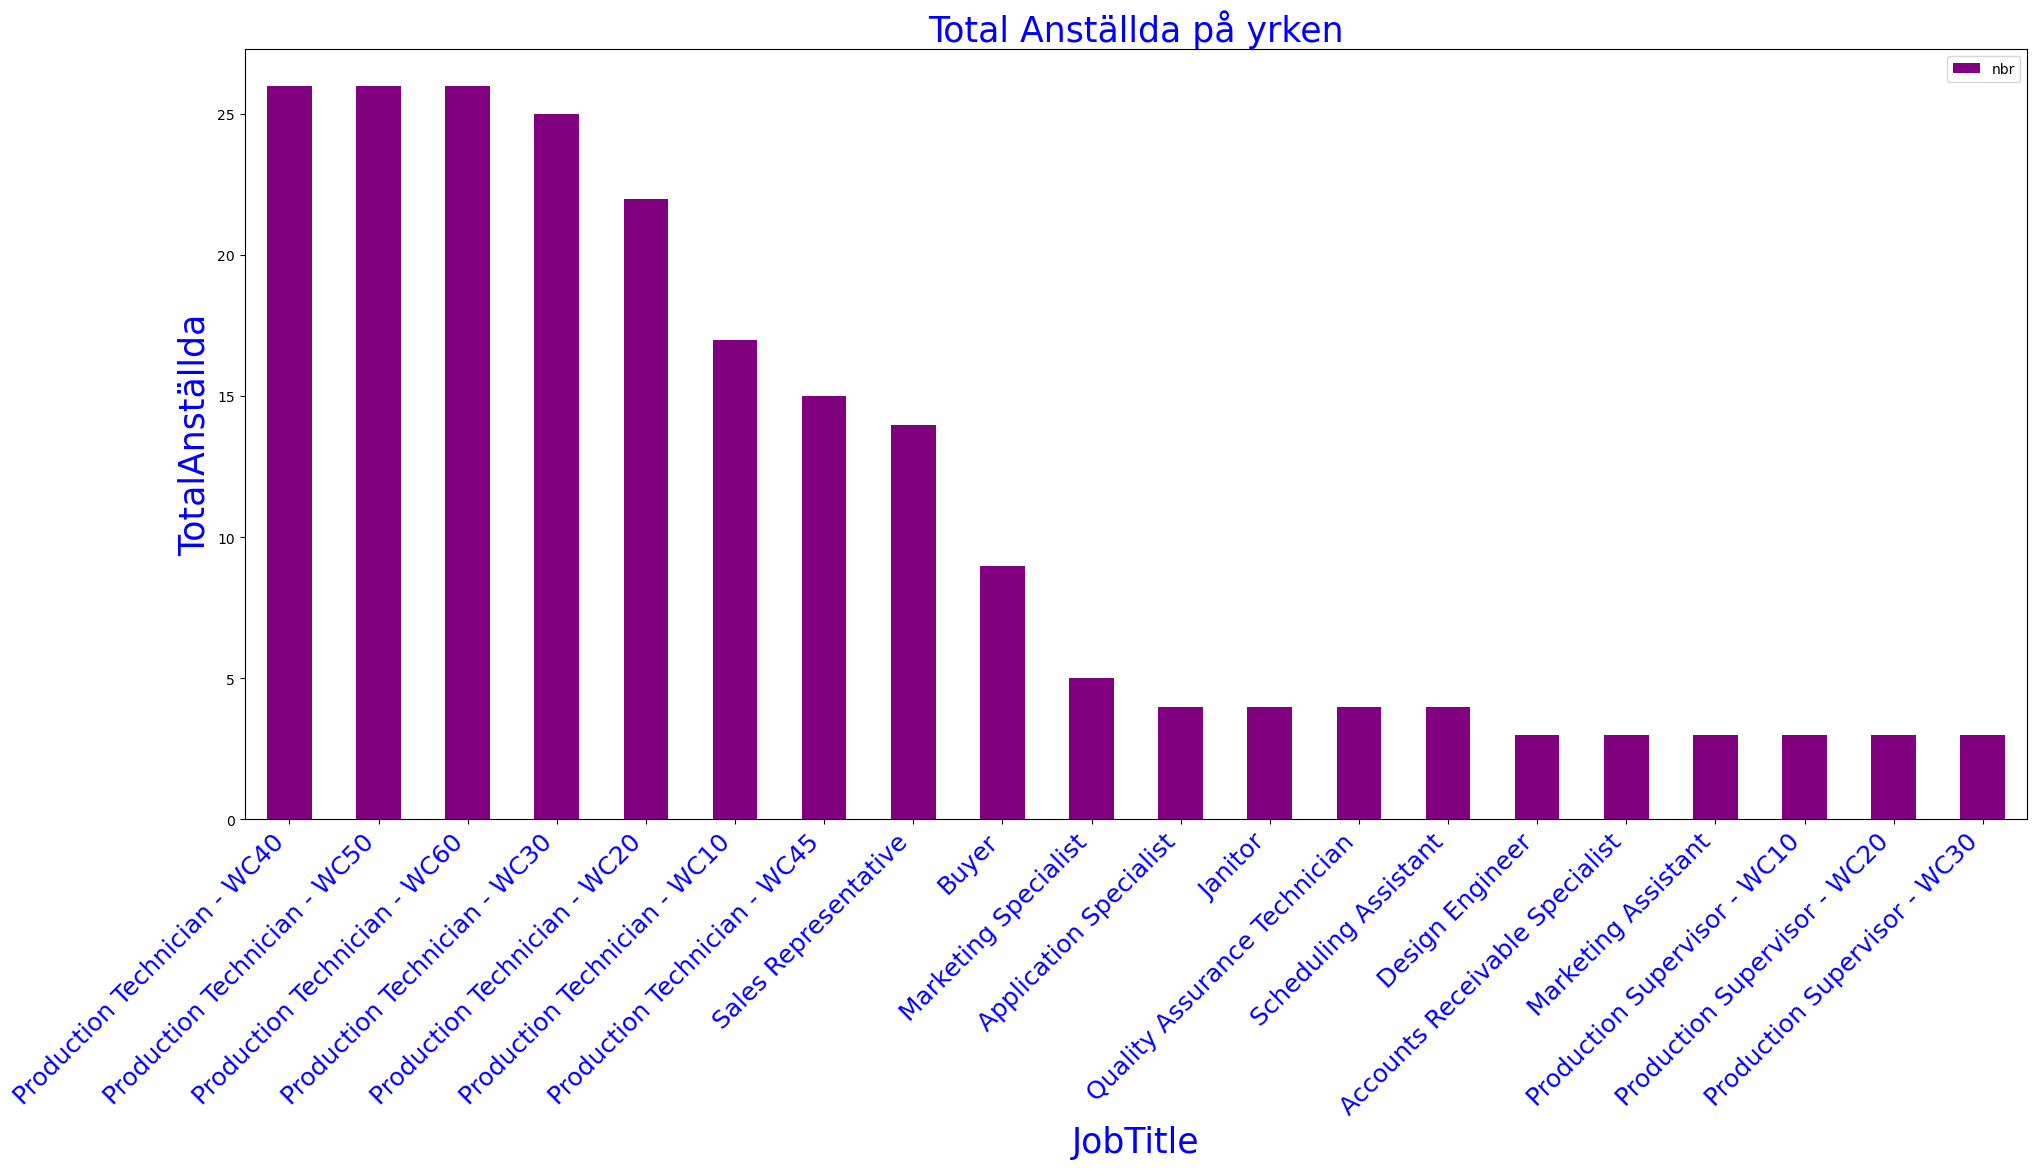

In [6]:
#Visualisearingar data med hjälp av matplotlib
DataINjob.plot(x="JobTitle", y="nbr",kind="bar", figsize=(23,10), color="purple")
plt.title('Total Anställda på yrken',color="blue",size=25)
plt.xlabel('JobTitle',color="blue",size=25)
plt.ylabel('TotalAnställda',color="blue",size=25)
plt.xticks(rotation=45,ha="right",size=18,color="blue")
plt.show()

In [7]:
Sales = """
SELECT CAST(OrderDate AS DATE) AS OrderDate, COUNT(*) as Total_sold
FROM Sales.SalesOrderHeader
GROUP BY CAST(OrderDate AS DATE)
ORDER BY OrderDate;
"""

# Hämta data
Sales_Data = pd.read_sql(Sales, connection)

# Visa resultat
print(Sales_Data)

       OrderDate  Total_sold
0     2011-05-31          43
1     2011-06-01           4
2     2011-06-02           5
3     2011-06-03           2
4     2011-06-04           5
...          ...         ...
1119  2014-06-26          29
1120  2014-06-27          32
1121  2014-06-28          31
1122  2014-06-29          23
1123  2014-06-30          40

[1124 rows x 2 columns]


In [8]:
import numpy as np
from scipy import stats
#Statistik för Order
mean_value = np.mean(Sales_Data['Total_sold'])
print(f"Mean: {mean_value:.2f}")

# Beräkna standardavvikelsen
std_dev = np.std(Sales_Data ['Total_sold'])
print(f"Standard deviation:{std_dev : .2f}")

#Beräkna Konfidenceinterval
confidence_level = 0.95

n = len(Sales_Data)
alpha = 1 - confidence_level
df=n-1
t_critical = stats.t.ppf(1 - alpha/2, df)
margin_of_error = t_critical * (std_dev / np.sqrt(n))
confidence_interval = (mean_value - margin_of_error, mean_value + margin_of_error)

print(f"Konfidensintervallet är: {confidence_interval}")



Mean: 27.99
Standard deviation: 33.39
Konfidensintervallet är: (26.039655916710863, 29.9478885672749)


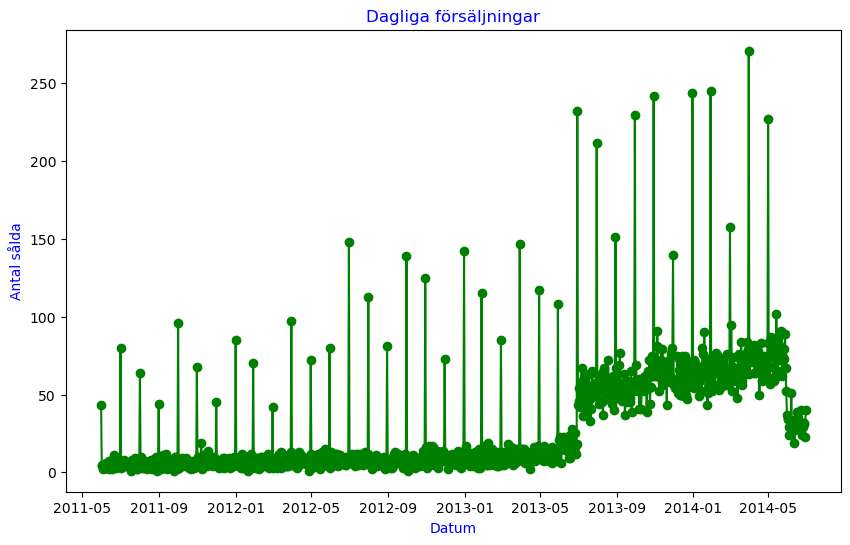

In [9]:
#visualisearingar för order hjälp med av matplotlib
plt.figure(figsize=(10 , 6))
plt.plot(Sales_Data['OrderDate'], Sales_Data['Total_sold'], marker='o', color='green')
plt.title('Dagliga försäljningar' , color = "blue")
plt.xlabel('Datum' , color = "blue")
plt.ylabel('Antal sålda' , color = "blue")
plt.show()

Resultat Analys:
Analysen visar

Resultat av Analys - Jobbrollen

Analysen visar att Production Technician är det vanligaste jobbet, med totalt 157 anställda fördelade på olika produktionsgrupper (WC10 till WC60). Därefter följer Sales Representative med 14 anställda och Buyer med 9 anställda.

Yrken som Marketing Specialist, Application Specialist, Janitor, Quality Assurance Technician, Scheduling Assistant, Marketing Assistant och Design Engineer har ett medelhögt behov med mellan 3 och 5 anställda per roll.

Yrken som Accounts Receivable Specialist, Production Supervisor och Stocker har däremot en lägre efterfrågan med endast 3 anställda per roll.

Resultat av Analys - försäljningen

Medelvärde
Analysen visar att snittet av försäljningen per dag är 22,32 och det ger en tydlig uppfattning om den genomsnittliga dagliga försäljningsvolymen under perioden.

Standardavvikelse
Standardavvikelsen är 12,45, vilket indikerar en måttlig variation i försäljningen mellan dagar och försäljningsresultatet är relativt stabilt, men med vissa fluktuationer.

Total försäljning
Den totala försäljningsvolymen för hela perioden är 25 094 enheter. Detta ger en översikt över den ackumulerade prestandan för analysperioden.

Konfidensintervall
För det dagliga medelvärdet är 21,45–23,19. Detta ger en hög säkerhetsmarginal för de genomsnittliga dagliga försäljningsvärdena.

För den totala försäljningen Konfidensintervallet är 23 456–26 732, vilket antyder viss osäkerhet i de totala försäljningsvärdena beroende på variationer i data och modellen.

Rekommendationer:
Det är en bra idé att fortsätta följa försäljningen varje dag för att upptäcka förändringar. Det kan också vara viktigt att undersöka dagar med hög eller låg försäljning för att förstå orsakerna, såsom kampanjer eller andra faktorer. Kampanjer kan planeras under perioder med lägre försäljning för att öka intäkterna och jämna ut variationer.

Självvärdering

1. Utmaningar du haft under arbetet samt hur du hanterat dem.
Ans: En av de största utmaningarna jag hade under kursen var att hitta tid för att läsa alla texter och följa alla lektioner. För att lösa detta gjorde jag ett schema där jag prioriterade mina uppgifter och delade upp dem i mindre steg. Detta hjälpte mig att minska stressen och slutföra mina uppgifter i tid.

2. Vilket betyg du anser att du skall ha och varför.
Ans: Jag tycker att jag förtjänar ett bra betyg. Jag genomförde uppgifterna i tid och var aktiv under hela kursen. Samtidigt känner jag att det finns områden där jag kunde ha förstått materialet bättre, speciellt i början av kursen.

3. Tips du hade gett till dig själv i början av kursen nu när du slutfört den.
Ans: Om jag hade fått ett råd i början av kursen hade jag rekommenderat att jag skulle sköta min tid bättre. Jag skulle också ha sett till att se över kursmaterialet regelbundet, vilket hade gjort uppgifterna lättare att genomföra och minskat stressen mot slutet.
